<a href="https://colab.research.google.com/github/dell-datascience/Inage_classifier/blob/main/extract_defect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from os import listdir
import re
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import seaborn as sb
%config InlineBackend.figure_format = 'retina'
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/research/pulse_logfiles' 
% ls-l

In [79]:
files=list(listdir('/content/drive/MyDrive/research/pulse_logfiles'))   #Return a list containing the names of the files in the directory
def convert(str):
    return int("".join(re.findall("\d", str)))                           #isolate the digits
files.sort(key=convert)
files

['1KeV.mc.log',
 '2KeV.mc.log',
 '5KeV.mc.log',
 '10KeV.mc.log',
 '15KeV.mc.log',
 '20KeV.mc.log',
 '25KeV.mc.log',
 '30KeV.mc.log',
 '35KeV.mc.log',
 '40KeV.mc.log']

In [76]:
                                                                                            # in this code i aim to extract the defect log from MMonCa logfile and analyse the defects
def analyze(aa):
  dic={}                                                                                      #dictionary to hold values for each run
  mydata=[]                                                                                   #list to append data
  start,end=[],[]                                                                             #get the beginning and end of the lines for each run
  trap=0 
  total_trapped=[]
  num=161 
  a=aa                                                                                       #number of run
  pka=files[a]
  data=open(pka,'rt')                                                                         #open the logfile as readtext
  for j in range(2,num+1,1):                                                                  #iterator to loop through logfile based on number of runs
    data=open(pka)                                                                            #open the log file 
    for i,line in enumerate(data):                                                            #loop logfile
      if line.startswith('{} start'.format(j)):                                               #select start line number 
        start.append(i)
      if line.startswith('{} end'.format(j)):                                                 #select end line number 
        end.append(i)

  data=open(pka,'rt')                                                                         #open the logfile as readtext
  for line in data:                                                                           #iterate over each line in data 
    mydata.append(line.rstrip())                                                              #append line from data to list
  for i in range(1,len(start)+1):                                                             #iterate over each run a 
    val=mydata[start[i-1]+7:end[i-1]]                                                         #extract the defects from logfile
    dic[i]=dic.get(i,val)                                                                     #add values to dictionary

  for epoch in range(1,len(dic)+1,1):                                                         #iteration number
    for idx in range(0,len(dic[epoch])):                                                      #for each iteration 
      if (re.findall('He(\d)\S+',dic[epoch][idx]) or re.findall('He[A-Z]',dic[epoch][idx]) ): #if HenVn or HenIn or HeV or Hen 
        # print(re.findall('He.+',dic[epoch][idx]))      #checkpoint                          # display epoch defects stats
        size=(re.findall('\S.+/He(\d)',dic[epoch][idx]))                                      #take He cluster size (Hen->n)
        try: size[0]                                                                          #if cluster size is empty
        except:size.append(1)                                                                 #append 1 
        count=re.findall('/He.+(..\d)',dic[epoch][idx])                                       #take count
        size,count=int(size[0]),int(count[0])                                                 #convert to int
        # print(size,count)                               #checkpoint                         #Number of He in Hen or HeI, count 
        trap+=size*count
    total_trapped.append(trap)
    trap=0                                                                                    #reinitialize trap to zero to prevent cumulative add
  return total_trapped                                                                        #return total_trapped                     

In [83]:
KeV_1=analyze(0)
KeV_2=analyze(1)
KeV_5=analyze(2)
KeV_10=analyze(3)
KeV_15=analyze(4)
KeV_20=analyze(5)
KeV_25=analyze(6)
KeV_30=analyze(7)
KeV_35=analyze(8)
KeV_40=analyze(9)

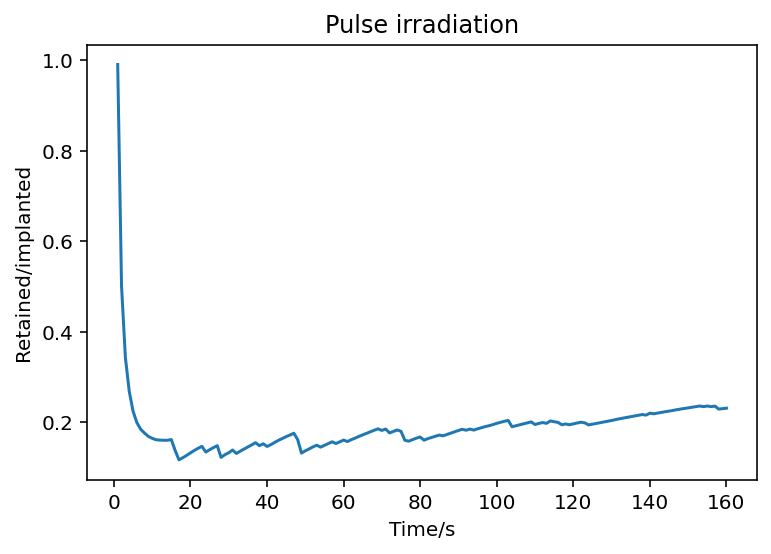

In [56]:
inserted=[x*2400 for x in np.arange(1,161) ]
ratio=np.divide(total_trapped, inserted)
time=np.arange(1,161)
sb.lineplot(x=time,y=ratio)
plt.xlabel('Time/s')
plt.ylabel('Retained/implanted')
plt.title('Pulse irradiation');
